### Pandas

In [2]:
# pip install pandas
import pandas as pd

In [3]:
# Series
list1 = [1, 7, 2]
myvar = pd.Series(list1)
print(myvar)

0    1
1    7
2    2
dtype: int64


In [4]:
# Labels
list1 = [4, 7, 5]
myvar = pd.Series(list1, index = ["x", "y", "z"])
print(myvar)
print(myvar['y'])

x    4
y    7
z    5
dtype: int64
7


In [5]:
# Dict to Series
# Example-1
calories = {"day1": 420, "day2": 380, "day3": 390}
myvar = pd.Series(calories)
print(myvar)
print()

# Example-2
calories = {"day1": 420, "day2": 380, "day3": 390}
myvar = pd.Series(calories, index = ["day1", "day2"])
print(myvar)
print()

day1    420
day2    380
day3    390
dtype: int64

day1    420
day2    380
dtype: int64



In [6]:
# Dictionary to DataFrame
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
print(df) 
print()

# Locate Row (loc)
print(df.loc[0])
print()

#use a list of indexes:
print(df.loc[[0, 1]])
print()

# named index
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}
df = pd.DataFrame(data, index = ["day1", "day2", "day3"])
print(df) 
print()

   calories  duration
0       420        50
1       380        40
2       390        45

calories    420
duration     50
Name: 0, dtype: int64

   calories  duration
0       420        50
1       380        40

      calories  duration
day1       420        50
day2       380        40
day3       390        45



In [35]:
# Load Files Into a DataFrame

# Example-1
pd.options.display.max_rows = 9999
df = pd.read_csv("data/data1.csv") # file with csv data
# print(df.to_string())

# Example-2
pd.options.display.max_rows = 9999
df = pd.read_json("data/sample_1.json") # file with disctionary data
# print(df.to_string())

### Data Analyzing

In [9]:
df = pd.read_csv("data/data1.csv") # file with csv data
print(df.info())

# print(df.to_string())
# print()
# print(df.head(2)) # First 2 Rows
# print()
# print(df.tail(2)) # Last 2 Rows
# print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SN       3 non-null      int64 
 1   NAME     3 non-null      object
 2   ADDRESS  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes
None


### Data Cleaning

In [30]:
import pandas as pd
pd.options.display.max_rows = 9999
df = pd.read_csv('data\\movie_metadata2.csv')

# Cleaning Empty Cells
new_df = df.dropna()
print(new_df.to_string())
print()

# Replace empty values
df.fillna(130, inplace = True)
print(df.to_string())
print()

# Replace with specified columns
df["Calories"].fillna(130, inplace = True)
print(df.to_string())
print()

# Mean
x = df["Calories"].mean()
df["Calories"].fillna(x, inplace = True)
print(df.to_string())
print()

# Median
x = df["Calories"].median()
df["Calories"].fillna(x, inplace = True)
print(df.to_string())
print()

# Mode
x = df["Calories"].mode()[0]
df["Calories"].fillna(x, inplace = True)
print(df.to_string())
print()

In [56]:
import pandas as pd

#importing the dataset by reading the csv file
data = pd.read_csv('data/employee_data.csv')

In [ ]:
#displaying the first five rows of dataset 
# data.head()

#displayinf last five rows of dataset
# data.tail()

In [62]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             1000 non-null   int64  
 1   first_name         999 non-null    object 
 2   last_name          999 non-null    object 
 3   gender             793 non-null    object 
 4   birth_date         999 non-null    object 
 5   employment_status  811 non-null    object 
 6   annual_salary      999 non-null    float64
 7   tax_file_no        0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB
None


In [64]:
# isnull
# data.isnull()

In [66]:
# isna
# data.isna()
# data.isna().any()
# data.isna().sum()
data.isna().any().sum()

7

### Pandas Database Connection

In [2]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Reading from CSV
weather = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')
conn = sql.connect("MyDb.db")

# Writing to SQLite DB
weather.to_sql('wether', conn)

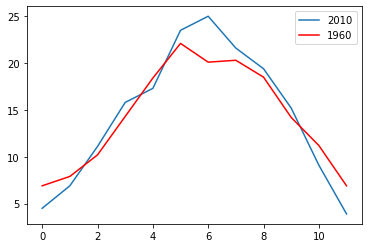

In [19]:
# Reading values from SQLite DB
conn = sql.connect('MyDb.db')
wether = pd.read_sql('SELECT * FROM wether', conn)
# print(wether)

y1960 = pd.read_sql('SELECT * FROM wether WHERE Year == 1960', conn)
y2010 = pd.read_sql('SELECT * FROM wether WHERE Year == 2010', conn)

# Ploting
ax2010 = y2010.plot(y='Tmax')
ax = y1960.plot(y='Tmax',color = 'red', ax=ax2010)
ax.legend(['2010','1960'])

<AxesSubplot:ylabel='Frequency'>

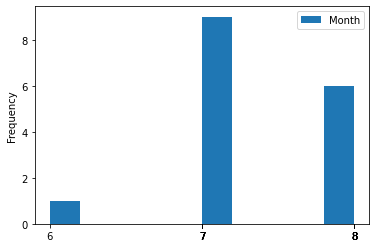

In [22]:
high = pd.read_sql('SELECT Year,Month,Tmax FROM wether WHERE Tmax > 25 ORDER BY Tmax DESC', conn)
# print(high)
high.plot.hist(y='Month', xticks=high['Month'])

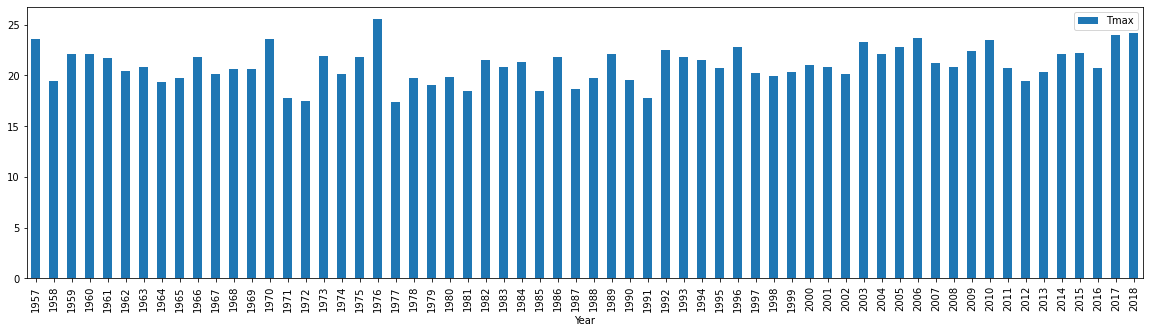

In [27]:
july = pd.read_sql('SELECT Year,Month,Tmax FROM wether WHERE month == 6', conn)
fig = july.plot.bar(x='Year', y='Tmax', figsize=(20,5));
fig.figure.savefig("samplechart.jpg")

In [13]:
# Plot (chart) pandas data freame/series using seaborn/pyplot